# Business problem: Build a classifier to match content with topics

### input: content_info
### output: list of topics_ids that match the content

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from commom_functions import *

In [2]:
df_content = pd.read_csv('data/content.csv')
df_content.head()

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA


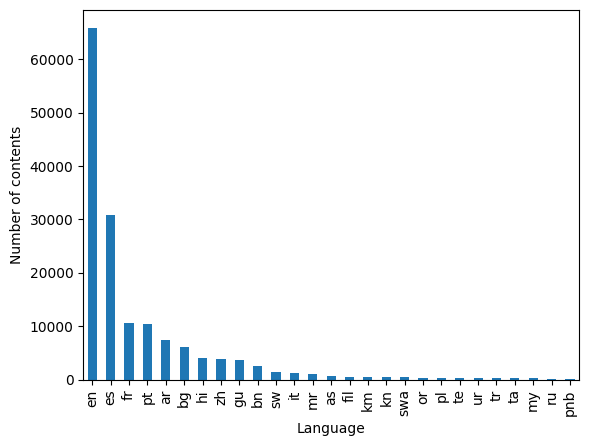

In [3]:
df_content['language'].value_counts().plot(kind='bar')
plt.xlabel("Language")
plt.ylabel("Number of contents");

In [4]:
pareto_df = pareto_analysis(df_content, 'language')
pareto_df.head()

,count,percentage,cumulative_percentage
language,,,
en,65939,42.804469,42.804469
es,30844,20.022461,62.826929
fr,10682,6.934247,69.761177
pt,10435,6.773907,76.535083
ar,7418,4.815413,81.350497


### The dataset contains contents in many different languages. I will continue the analysis only for documents in English, that accounts for more than 40% of the contents. As a data product evolution, more languages can be included. Filtering by language helps reduce variability in text structure and model complexity at this stage, making it easier to prototype and validate assumptions before scaling to multilingual scenarios.

In [5]:
df_content['kind'].value_counts()

kind
video       61487
document    33873
html5       32563
exercise    25925
audio         199
Name: count, dtype: int64

In [6]:
pareto_content_kind = pareto_analysis(df_content, 'kind', filter_col='language', filter_val='en')
pareto_content_kind.head()

,count,percentage,cumulative_percentage
kind,,,
video,22444,34.037520,34.037520
html5,21324,32.338980,66.376499
exercise,11485,17.417613,83.794113
document,10636,16.130060,99.924172
audio,50,0.075828,100.000000


### Words per content type: Are there certain kinds that tend to have more text? This can help creating good classifiers, longer texts might be associated with certain topics or indicate more detailed content, helping to differentiate between topics.

In [7]:
df_en = df_content[df_content['language'] == 'en']
df_en.head()

,id,title,description,kind,text,language,copyright_holder,license
5,c_00019840d110,5.12E: Regulation of the Calvin Cycle,NaN,html5,LEARNING OBJECTIVES\n\nOutline the three major...,en,CSU and Merlot,CC BY-NC-SA
8,c_00027d03ca7d,4.E: Genomes and Chromosomes (Exercises),NaN,html5,4.3\n\n(BPA) Answer the following questions wi...,en,CSU and Merlot,CC BY-NC-SA
10,c_000425df0161,9.3: Van Der Waals Forces between Atoms,NaN,html5,Introduction\n\nThe perfect gas equation of st...,en,CSU and Merlot,CC BY-NC-SA
11,c_00046806ad8a,Compare multi-digit numbers,Use your place value skills to practice compar...,exercise,NaN,en,NaN,NaN
18,c_000751f58836,Tangents of circles problem (example 2),Sal finds a missing angle using the property t...,video,Angle A is a circumscribed angle on circle O. ...,en,Khan Academy,CC BY-NC-SA


In [8]:
pareto_content_kind = pareto_analysis(df_en, 'kind')
pareto_content_kind.head()

,count,percentage,cumulative_percentage
kind,,,
video,22444,34.037520,34.037520
html5,21324,32.338980,66.376499
exercise,11485,17.417613,83.794113
document,10636,16.130060,99.924172
audio,50,0.075828,100.000000


In [9]:
# The title will be disregarded — the text and description are assumed to be more meaningful than the title.
df_en = clean_textlines(df_en, ['description', 'text'])
df_en['full_text'] = df_en['description'] + df_en['text']
df_en = df_en[df_en['full_text'].str.strip().astype(bool)]
df_en['full_text'] = df_en['full_text'].str.lower()
print(df_en.shape)
df_en.head()

/Users/thamysabrahao/Documents/GitHub/content-topic-classifier/commom_functions.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna("").str.replace("\n", " ")
/var/folders/6l/ks3bzsr54hj3fqpqr8q3g7l00000gn/T/ipykernel_83503/2530503924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['full_text'] = df_en['description'] + df_en['text']


(46130, 9)


,id,title,description,kind,text,language,copyright_holder,license,full_text
5,c_00019840d110,5.12E: Regulation of the Calvin Cycle,,html5,LEARNING OBJECTIVES Outline the three major p...,en,CSU and Merlot,CC BY-NC-SA,learning objectives outline the three major p...
8,c_00027d03ca7d,4.E: Genomes and Chromosomes (Exercises),,html5,4.3 (BPA) Answer the following questions with...,en,CSU and Merlot,CC BY-NC-SA,4.3 (bpa) answer the following questions with...
10,c_000425df0161,9.3: Van Der Waals Forces between Atoms,,html5,Introduction The perfect gas equation of stat...,en,CSU and Merlot,CC BY-NC-SA,introduction the perfect gas equation of stat...
11,c_00046806ad8a,Compare multi-digit numbers,Use your place value skills to practice compar...,exercise,,en,NaN,NaN,use your place value skills to practice compar...
18,c_000751f58836,Tangents of circles problem (example 2),Sal finds a missing angle using the property t...,video,Angle A is a circumscribed angle on circle O. ...,en,Khan Academy,CC BY-NC-SA,sal finds a missing angle using the property t...


In [10]:
df_en['word_count'] = df_en['full_text'].str.split().str.len()
word_stats = df_en.groupby('kind')['word_count'].agg(['mean', 'median'])
print(word_stats)

                 mean  median
kind                         
audio        9.166667     8.5
document  2640.692053   571.0
exercise    61.924960    10.0
html5     1193.396902   658.0
video      817.187864   724.0


In [11]:
with pd.option_context('display.max_colwidth', None):
    df_en[df_en['kind'] == 'html5'].head()

### I will focus on the content types 'document', 'html', and 'video' because they tend to have more text. That gives the classifier more information to learn from, which should lead to better results.

In [12]:
df_content_classifier = df_en[(df_en['language'] == 'en') & (df_en['kind'].isin(['document', 'html5', 'video']))]
df_content_classifier.shape

(40487, 10)

# Including topics into the analysis

In [13]:
df_topic_content = pd.read_csv("data/correlations.csv")
print(df_topic_content.shape)
df_topic_content.head()

(61517, 2)


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4


In [14]:
df_topic_content = (df_topic_content[['topic_id', 'content_ids']]
                    .assign(content_id=lambda df: df['content_ids'].str.split())
                    .explode('content_id'))
df_topic_content.head()

,topic_id,content_ids,content_id
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,c_1108dd0c7a5d
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,c_376c5a8eb028
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,c_5bc0e1e2cba0
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,c_76231f9d0b5e
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...,c_639ea2ef9c95


In [15]:
# Joining with contents (df_content_classifier) that will be used to create the classifier

df_merged = pd.merge(df_content_classifier, df_topic_content[['topic_id', 'content_id']], left_on='id', right_on='content_id', how='left', indicator=True)
df_merged.shape

(75473, 13)

In [16]:
# One content is attached with more than one topic
df_merged['id'].value_counts()
df_merged[df_merged['id'] == 'c_2f8849826d71']['topic_id'].nunique()

75

In [17]:
# Total topics
df_merged['topic_id'].nunique()

16457

In [18]:
# How many topics accounts for 80% of the content?
pareto_topics = pareto_analysis(df_merged, 'topic_id')
pareto_topics[pareto_topics['cumulative_percentage'] <= 80]

,count,percentage,cumulative_percentage
topic_id,,,
t_58ca0afc0bae,270,0.357744,0.357744
t_b3fa23bfbeaa,264,0.349794,0.707538
t_92cf4e58f786,257,0.340519,1.048057
t_17bf2af6d82b,214,0.283545,1.331602
t_ba5de272b4cb,205,0.271620,1.603222
...,...,...,...
t_8dc7fc8381c1,3,0.003975,79.982245
t_3390a51c034e,3,0.003975,79.986220
t_737f33d9dfb6,3,0.003975,79.990195


In [19]:
topics_list = set(pareto_topics[pareto_topics['cumulative_percentage'] <= 80].index)
len(topics_list)

7928

## The classifier POC will focus on 7928 topics and 40487 documents identified in this analysis. This ensures that each topic has more than one associated content item, and that each piece of content has enough descriptive text to support classification.

In [21]:
df_classifier = df_merged[df_merged['topic_id'].isin(topics_list)]
print(df_classifier.shape)

(60377, 13)


In [22]:
df_classifier.head()

,id,title,description,kind,text,language,copyright_holder,license,full_text,word_count,topic_id,content_id,_merge
0,c_00019840d110,5.12E: Regulation of the Calvin Cycle,,html5,LEARNING OBJECTIVES Outline the three major p...,en,CSU and Merlot,CC BY-NC-SA,learning objectives outline the three major p...,727,t_b84ad11c2c60,c_00019840d110,both
1,c_00027d03ca7d,4.E: Genomes and Chromosomes (Exercises),,html5,4.3 (BPA) Answer the following questions with...,en,CSU and Merlot,CC BY-NC-SA,4.3 (bpa) answer the following questions with...,304,t_025ae12316a0,c_00027d03ca7d,both
2,c_00027d03ca7d,4.E: Genomes and Chromosomes (Exercises),,html5,4.3 (BPA) Answer the following questions with...,en,CSU and Merlot,CC BY-NC-SA,4.3 (bpa) answer the following questions with...,304,t_8e66ceba3d0b,c_00027d03ca7d,both
3,c_000425df0161,9.3: Van Der Waals Forces between Atoms,,html5,Introduction The perfect gas equation of stat...,en,CSU and Merlot,CC BY-NC-SA,introduction the perfect gas equation of stat...,1390,t_8d572616c218,c_000425df0161,both
4,c_000751f58836,Tangents of circles problem (example 2),Sal finds a missing angle using the property t...,video,Angle A is a circumscribed angle on circle O. ...,en,Khan Academy,CC BY-NC-SA,sal finds a missing angle using the property t...,586,t_3790725dbc78,c_000751f58836,both
